# Support Vector Machines Lab Notebook

This notebook contains the complete implementation and analysis of Support Vector Machines
from scratch, comparison with scikit-learn, and comprehensive performance evaluation.

Author: Nelson Masbayi
Date: June 2025

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
import sys
import os

# Add src directory to the path for our custom modules
sys.path.append('../src')

# Import our custom modules
from data_generators import (
    generate_linearly_separable_data,
    generate_nonlinear_data,
    get_dataset_info,
    validate_dataset
)
from visualization import (
    plot_2d_classification_data,
    plot_decision_boundary,
    plot_training_history,
    plot_multiple_kernels_comparison,
    setup_plot_style
)

# Set up plotting style
setup_plot_style(figsize=(10, 8))

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
np.set_printoptions(precision=4, suppress=True)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("All imports successful!")
print("Ready for SVM Lab Implementation")
print(f"Working directory: {os.getcwd()}")

All imports successful!
Ready for SVM Lab Implementation
Working directory: C:\Users\nelso\OneDrive\Desktop\svm-machine-learning-lab\notebooks


## 1. Data Generation and Exploration

## 🔄 Dataset Generation

In [11]:
print("Generating datasets for SVM analysis...")
print("=" * 60)

# Generate linearly separable dataset
print("\n1. LINEARLY SEPARABLE DATASET")
print("-" * 40)

X_linear, y_linear = generate_linearly_separable_data(
    n_samples=100,
    random_state=42,
    class_sep=2.0,
    noise_std=0.5
)

# Validate and get info
validate_dataset(X_linear, y_linear)
linear_info = get_dataset_info(X_linear, y_linear)

print(f"Generated linearly separable data:")
print(f"   • Samples: {linear_info['n_samples']}")
print(f"   • Features: {linear_info['n_features']}")
print(f"   • Classes: {linear_info['class_balance']}")
print(f"   • Feature 1 range: [{linear_info['feature_ranges']['min'][0]:.2f}, {linear_info['feature_ranges']['max'][0]:.2f}]")
print(f"   • Feature 2 range: [{linear_info['feature_ranges']['min'][1]:.2f}, {linear_info['feature_ranges']['max'][1]:.2f}]")

# Generate non-linearly separable dataset
print("\n2. NON-LINEARLY SEPARABLE DATASET")
print("-" * 40)

X_nonlinear, y_nonlinear = generate_nonlinear_data(
    n_samples=200,
    random_state=42,
    inner_radius=1.0,
    outer_radius_min=1.5,
    outer_radius_max=2.5
)

# Validate and get info
validate_dataset(X_nonlinear, y_nonlinear)
nonlinear_info = get_dataset_info(X_nonlinear, y_nonlinear)

print(f"Generated non-linearly separable data:")
print(f"   • Samples: {nonlinear_info['n_samples']}")
print(f"   • Features: {nonlinear_info['n_features']}")
print(f"   • Classes: {nonlinear_info['class_balance']}")
print(f"   • Feature 1 range: [{nonlinear_info['feature_ranges']['min'][0]:.2f}, {nonlinear_info['feature_ranges']['max'][0]:.2f}]")
print(f"   • Feature 2 range: [{nonlinear_info['feature_ranges']['min'][1]:.2f}, {nonlinear_info['feature_ranges']['max'][1]:.2f}]")

print(f"\nDatasets successfully generated and validated!")

Generating datasets for SVM analysis...

1. LINEARLY SEPARABLE DATASET
----------------------------------------
Generated linearly separable data:
   • Samples: 100
   • Features: 2
   • Classes: {np.float64(-1.0): np.int64(50), np.float64(1.0): np.int64(50)}
   • Feature 1 range: [-4.96, 4.79]
   • Feature 2 range: [-4.76, 4.93]

2. NON-LINEARLY SEPARABLE DATASET
----------------------------------------
Generated non-linearly separable data:
   • Samples: 200
   • Features: 2
   • Classes: {np.float64(-1.0): np.int64(100), np.float64(1.0): np.int64(100)}
   • Feature 1 range: [-2.80, 2.91]
   • Feature 2 range: [-2.50, 2.90]

Datasets successfully generated and validated!


### 📊 Data Visualization and Analysis

Creating data visualizations...


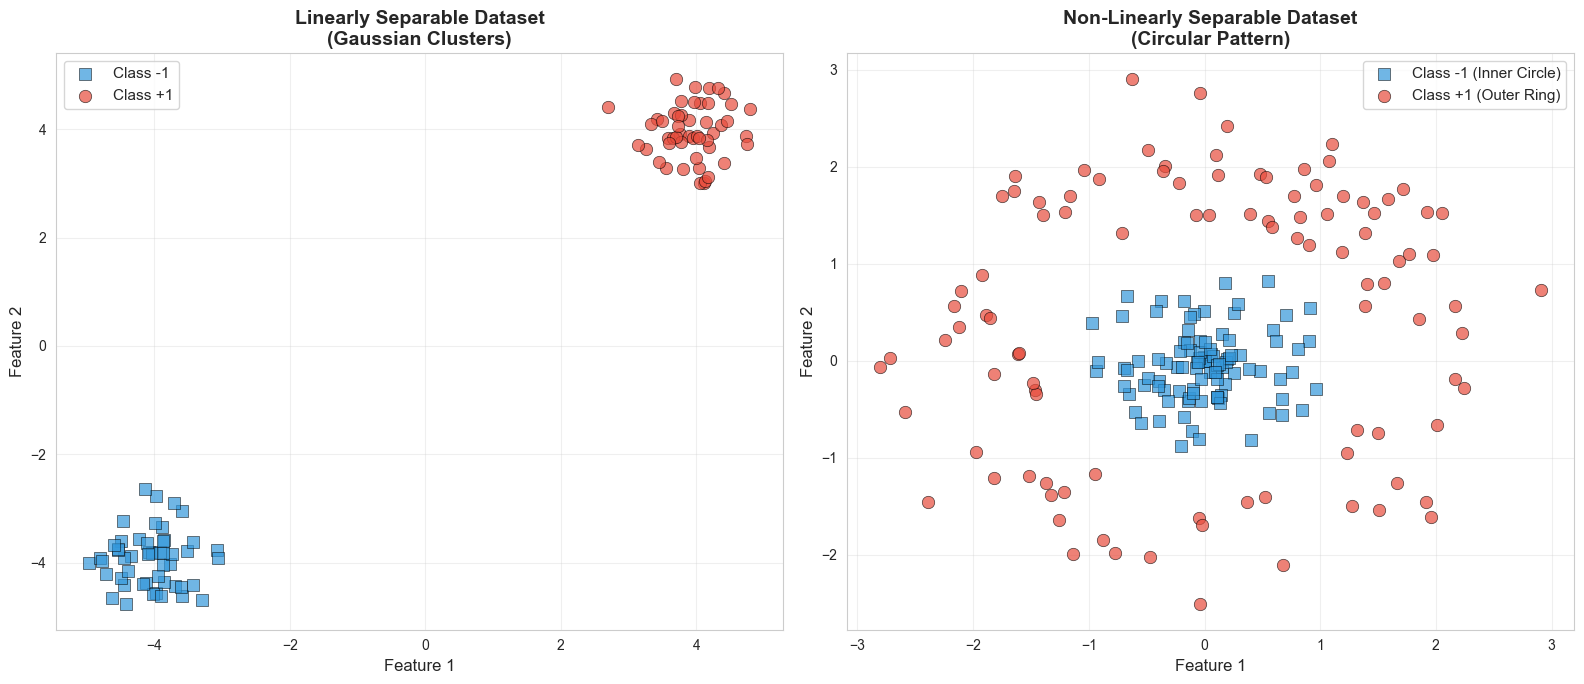

Dataset plots created and saved


In [12]:
print("Creating data visualizations...")
print("=" * 60)

# Create figure with subplots for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot linearly separable data
ax1 = plt.subplot(1, 2, 1)
for label in np.unique(y_linear):
    mask = y_linear == label
    color = '#e74c3c' if label > 0 else '#3498db'
    marker = 'o' if label > 0 else 's'
    class_name = f'Class +1' if label > 0 else f'Class -1'

    plt.scatter(X_linear[mask, 0], X_linear[mask, 1],
               c=color, marker=marker, s=80, alpha=0.7,
               label=class_name, edgecolors='black', linewidth=0.5)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Linearly Separable Dataset\n(Gaussian Clusters)', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot non-linearly separable data
ax2 = plt.subplot(1, 2, 2)
for label in np.unique(y_nonlinear):
    mask = y_nonlinear == label
    color = '#e74c3c' if label > 0 else '#3498db'
    marker = 'o' if label > 0 else 's'
    class_name = f'Class +1 (Outer Ring)' if label > 0 else f'Class -1 (Inner Circle)'

    plt.scatter(X_nonlinear[mask, 0], X_nonlinear[mask, 1],
               c=color, marker=marker, s=80, alpha=0.7,
               label=class_name, edgecolors='black', linewidth=0.5)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Non-Linearly Separable Dataset\n(Circular Pattern)', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/data_exploration/datasets_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dataset plots created and saved")

### 📈 Statistical Analysis of Datasets

In [13]:
print("Performing statistical analysis of datasets...")
print("=" * 60)

# Create comprehensive analysis
def analyze_dataset(X, y, dataset_name):
    """Perform comprehensive statistical analysis of a dataset"""

    print(f"\n{dataset_name.upper()} ANALYSIS")
    print("-" * 50)

    # Basic statistics
    print("Basic Statistics:")
    print(f"   • Total samples: {len(X)}")
    print(f"   • Features: {X.shape[1]}")
    print(f"   • Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
    print(f"   • Class balance ratio: {np.sum(y == 1) / np.sum(y == -1):.3f}")

    # Feature statistics
    print(f"\nFeature Statistics:")
    for i in range(X.shape[1]):
        feature_name = f"Feature {i+1}"
        print(f"   • {feature_name}:")
        print(f"     - Range: [{X[:, i].min():.3f}, {X[:, i].max():.3f}]")
        print(f"     - Mean ± Std: {X[:, i].mean():.3f} ± {X[:, i].std():.3f}")
        print(f"     - Median: {np.median(X[:, i]):.3f}")

    # Class-specific statistics
    print(f"\nClass-Specific Analysis:")
    for class_label in np.unique(y):
        class_mask = y == class_label
        class_data = X[class_mask]
        class_name = "Class +1" if class_label > 0 else "Class -1"

        print(f"   • {class_name} ({np.sum(class_mask)} samples):")
        print(f"     - Centroid: [{class_data[:, 0].mean():.3f}, {class_data[:, 1].mean():.3f}]")
        print(f"     - Spread (std): [{class_data[:, 0].std():.3f}, {class_data[:, 1].std():.3f}]")

        # Calculate distance from origin
        distances = np.sqrt(np.sum(class_data**2, axis=1))
        print(f"     - Avg distance from origin: {distances.mean():.3f}")

    # Separability analysis
    print(f"\nSeparability Analysis:")

    # Calculate inter-class distance
    class_1_centroid = X[y == 1].mean(axis=0)
    class_neg1_centroid = X[y == -1].mean(axis=0)
    inter_class_distance = np.linalg.norm(class_1_centroid - class_neg1_centroid)

    print(f"   • Inter-class centroid distance: {inter_class_distance:.3f}")

    # Calculate intra-class spread
    class_1_spread = np.mean(np.linalg.norm(X[y == 1] - class_1_centroid, axis=1))
    class_neg1_spread = np.mean(np.linalg.norm(X[y == -1] - class_neg1_centroid, axis=1))
    avg_intra_class_spread = (class_1_spread + class_neg1_spread) / 2

    print(f"   • Average intra-class spread: {avg_intra_class_spread:.3f}")
    print(f"   • Separability ratio: {inter_class_distance / avg_intra_class_spread:.3f}")

    return {
        'inter_class_distance': inter_class_distance,
        'avg_intra_class_spread': avg_intra_class_spread,
        'separability_ratio': inter_class_distance / avg_intra_class_spread,
        'class_balance_ratio': np.sum(y == 1) / np.sum(y == -1)
    }

# Analyze both datasets
linear_analysis = analyze_dataset(X_linear, y_linear, "Linearly Separable Dataset")
nonlinear_analysis = analyze_dataset(X_nonlinear, y_nonlinear, "Non-Linearly Separable Dataset")

# Summary comparison
print(f"\nDATASET COMPARISON SUMMARY")
print("=" * 50)
print(f"Linear Dataset Separability Ratio: {linear_analysis['separability_ratio']:.3f}")
print(f"Non-Linear Dataset Separability Ratio: {nonlinear_analysis['separability_ratio']:.3f}")
print(f"\nNote: Higher separability ratio indicates easier linear separation")

Performing statistical analysis of datasets...

LINEARLY SEPARABLE DATASET ANALYSIS
--------------------------------------------------
Basic Statistics:
   • Total samples: 100
   • Features: 2
   • Class distribution: {np.float64(-1.0): np.int64(50), np.float64(1.0): np.int64(50)}
   • Class balance ratio: 1.000

Feature Statistics:
   • Feature 1:
     - Range: [-4.959, 4.790]
     - Mean ± Std: -0.058 ± 4.013
     - Median: -0.183
   • Feature 2:
     - Range: [-4.757, 4.926]
     - Mean ± Std: 0.017 ± 3.978
     - Median: 0.183

Class-Specific Analysis:
   • Class -1 (50 samples):
     - Centroid: [-4.048, -3.930]
     - Spread (std): [0.438, 0.501]
     - Avg distance from origin: 5.661
   • Class +1 (50 samples):
     - Centroid: [3.932, 3.964]
     - Spread (std): [0.413, 0.487]
     - Avg distance from origin: 5.601

Separability Analysis:
   • Inter-class centroid distance: 11.225
   • Average intra-class spread: 0.585
   • Separability ratio: 19.177

NON-LINEARLY SEPARABLE DA

### 📊 Feature Distribution Analysis

Analyzing feature distributions...


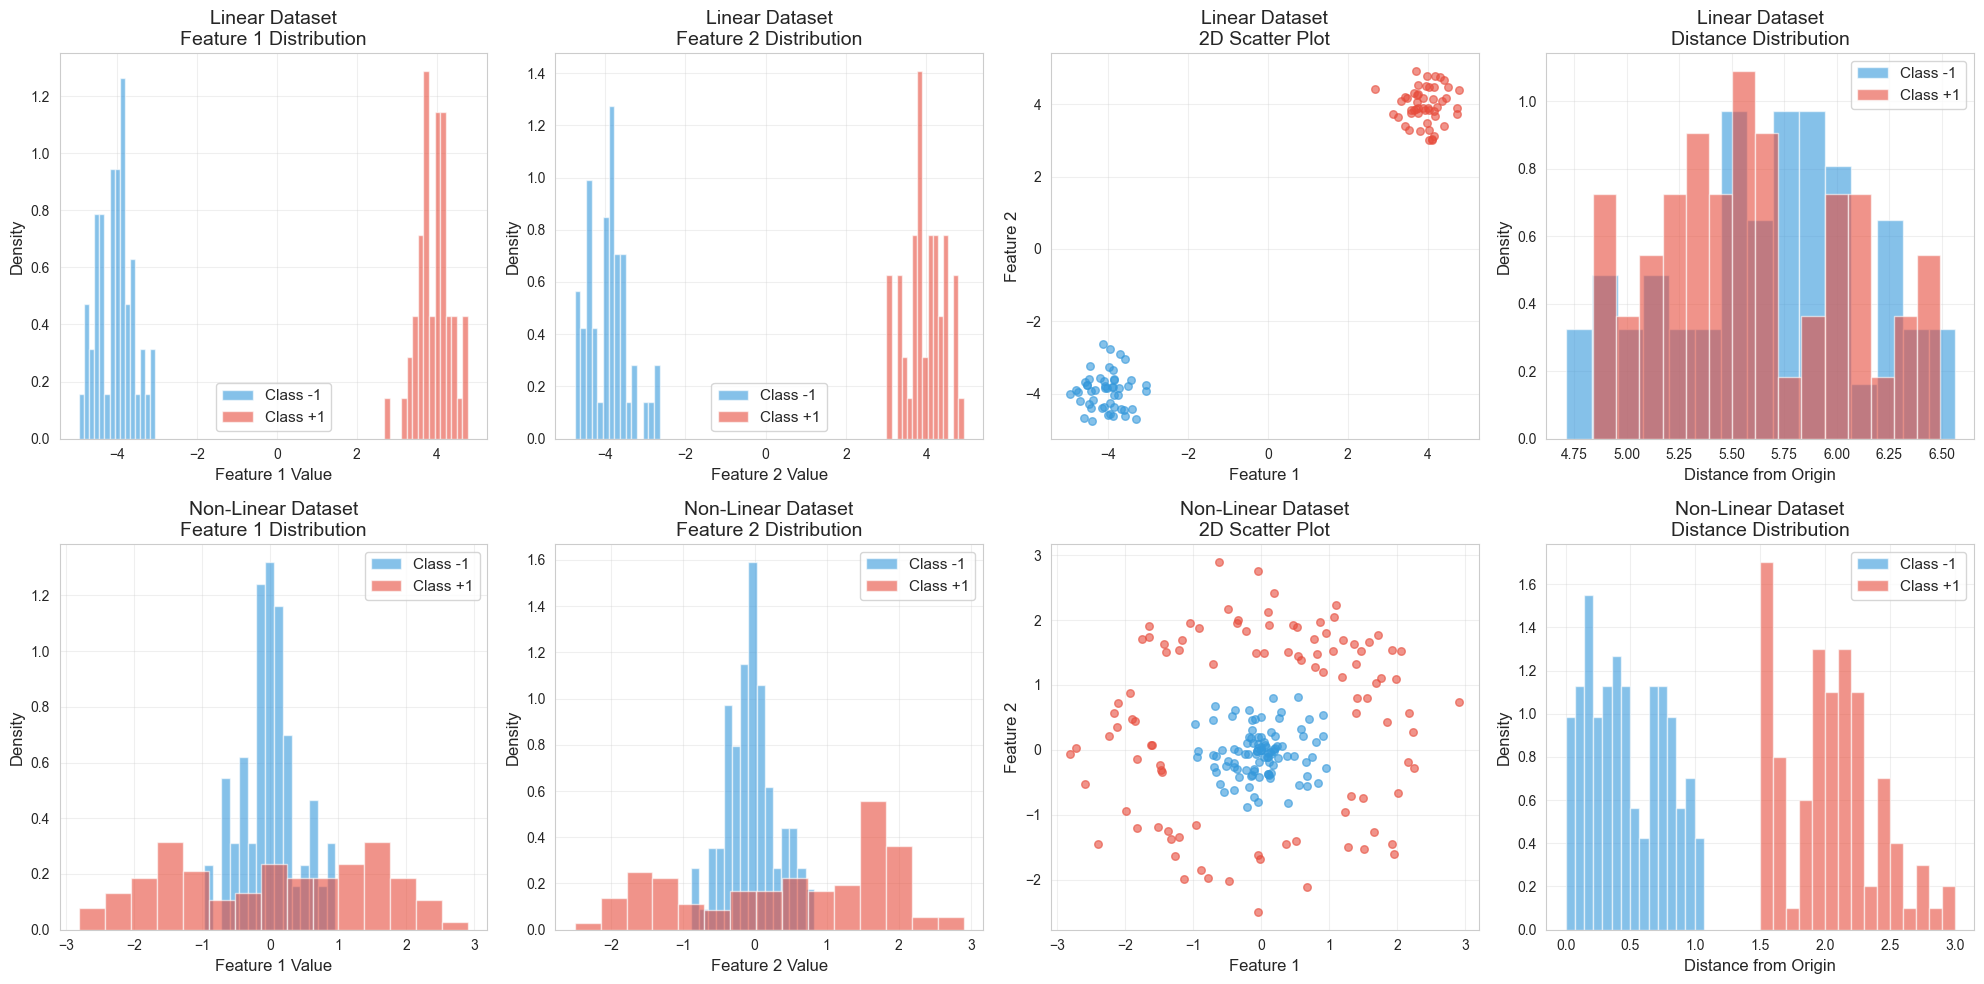

Feature distribution analysis completed and saved


In [14]:
print("Analyzing feature distributions...")
print("=" * 60)

# Create comprehensive distribution plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

datasets = [
    (X_linear, y_linear, "Linear Dataset"),
    (X_nonlinear, y_nonlinear, "Non-Linear Dataset")
]

for dataset_idx, (X, y, dataset_name) in enumerate(datasets):

    # Feature 1 distribution
    ax1 = axes[dataset_idx, 0]
    for class_label in np.unique(y):
        mask = y == class_label
        color = '#e74c3c' if class_label > 0 else '#3498db'
        label = f'Class +1' if class_label > 0 else f'Class -1'
        ax1.hist(X[mask, 0], alpha=0.6, color=color, label=label, bins=15, density=True)

    ax1.set_xlabel('Feature 1 Value')
    ax1.set_ylabel('Density')
    ax1.set_title(f'{dataset_name}\nFeature 1 Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Feature 2 distribution
    ax2 = axes[dataset_idx, 1]
    for class_label in np.unique(y):
        mask = y == class_label
        color = '#e74c3c' if class_label > 0 else '#3498db'
        label = f'Class +1' if class_label > 0 else f'Class -1'
        ax2.hist(X[mask, 1], alpha=0.6, color=color, label=label, bins=15, density=True)

    ax2.set_xlabel('Feature 2 Value')
    ax2.set_ylabel('Density')
    ax2.set_title(f'{dataset_name}\nFeature 2 Distribution')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 2D density plot
    ax3 = axes[dataset_idx, 2]
    for class_label in np.unique(y):
        mask = y == class_label
        color = '#e74c3c' if class_label > 0 else '#3498db'
        ax3.scatter(X[mask, 0], X[mask, 1], alpha=0.6, color=color, s=30)

    ax3.set_xlabel('Feature 1')
    ax3.set_ylabel('Feature 2')
    ax3.set_title(f'{dataset_name}\n2D Scatter Plot')
    ax3.grid(True, alpha=0.3)

    # Distance from origin distribution
    ax4 = axes[dataset_idx, 3]
    distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    for class_label in np.unique(y):
        mask = y == class_label
        color = '#e74c3c' if class_label > 0 else '#3498db'
        label = f'Class +1' if class_label > 0 else f'Class -1'
        ax4.hist(distances[mask], alpha=0.6, color=color, label=label, bins=15, density=True)

    ax4.set_xlabel('Distance from Origin')
    ax4.set_ylabel('Density')
    ax4.set_title(f'{dataset_name}\nDistance Distribution')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/data_exploration/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature distribution analysis completed and saved")

### 🔍 Data Quality Verification and Summary

In [15]:
print("Performing final data quality verification...")
print("=" * 60)

# Comprehensive data quality checks
def comprehensive_data_check(X, y, dataset_name):
    """Perform comprehensive data quality verification"""

    print(f"\n{dataset_name.upper()} - QUALITY VERIFICATION")
    print("-" * 50)

    checks_passed = 0
    total_checks = 0

    # Check 1: No missing values
    total_checks += 1
    if not np.any(np.isnan(X)) and not np.any(np.isnan(y)):
        print("✅ No missing values detected")
        checks_passed += 1
    else:
        print("❌ Missing values detected")

    # Check 2: No infinite values
    total_checks += 1
    if not np.any(np.isinf(X)) and not np.any(np.isinf(y)):
        print("✅ No infinite values detected")
        checks_passed += 1
    else:
        print("❌ Infinite values detected")

    # Check 3: Proper binary labels
    total_checks += 1
    unique_labels = np.unique(y)
    if len(unique_labels) == 2 and set(unique_labels) == {-1, 1}:
        print("✅ Proper binary labels (-1, +1)")
        checks_passed += 1
    else:
        print(f"⚠️  Labels: {unique_labels} (expected: [-1, 1])")

    # Check 4: Balanced classes (within reason)
    total_checks += 1
    class_counts = np.bincount((y + 1).astype(int))  # Shift to 0,2 for bincount
    balance_ratio = min(class_counts) / max(class_counts)
    if balance_ratio >= 0.8:  # At least 80% balance
        print(f"✅ Well-balanced classes (ratio: {balance_ratio:.3f})")
        checks_passed += 1
    else:
        print(f"⚠️  Imbalanced classes (ratio: {balance_ratio:.3f})")

    # Check 5: Reasonable feature scales
    total_checks += 1
    feature_ranges = X.max(axis=0) - X.min(axis=0)
    if np.all(feature_ranges > 0.1) and np.all(feature_ranges < 100):
        print(f"✅ Reasonable feature scales (ranges: {feature_ranges})")
        checks_passed += 1
    else:
        print(f"⚠️  Unusual feature scales (ranges: {feature_ranges})")

    # Check 6: Data complexity (not all points identical)
    total_checks += 1
    unique_points = len(np.unique(X, axis=0))
    if unique_points > len(X) * 0.8:  # At least 80% unique points
        print(f"✅ Sufficient data complexity ({unique_points}/{len(X)} unique points)")
        checks_passed += 1
    else:
        print(f"⚠️  Low data complexity ({unique_points}/{len(X)} unique points)")

    quality_score = checks_passed / total_checks
    print(f"\n Quality Score: {checks_passed}/{total_checks} ({quality_score*100:.1f}%)")

    return quality_score

# Run quality checks
linear_quality = comprehensive_data_check(X_linear, y_linear, "Linearly Separable Dataset")
nonlinear_quality = comprehensive_data_check(X_nonlinear, y_nonlinear, "Non-Linearly Separable Dataset")

# Final summary
print(f"\n PART 1 COMPLETION SUMMARY")
print("=" * 60)
print(f" Linear Dataset Generated: {len(X_linear)} samples, Quality: {linear_quality*100:.1f}%")
print(f" Non-Linear Dataset Generated: {len(X_nonlinear)} samples, Quality: {nonlinear_quality*100:.1f}%")
print(f" Comprehensive Visualizations Created")
print(f" Statistical Analysis Completed")
print(f" Data Quality Verified")

print(f"\n Ready to proceed to Phase 2: SVM Implementation from Scratch!")

# Save datasets for later use
np.savez('../data/generated/datasets.npz',
         X_linear=X_linear, y_linear=y_linear,
         X_nonlinear=X_nonlinear, y_nonlinear=y_nonlinear)

print(f" Datasets saved to '../data/generated/datasets.npz'")

Performing final data quality verification...

LINEARLY SEPARABLE DATASET - QUALITY VERIFICATION
--------------------------------------------------
✅ No missing values detected
✅ No infinite values detected
✅ Proper binary labels (-1, +1)
⚠️  Imbalanced classes (ratio: 0.000)
✅ Reasonable feature scales (ranges: [9.749  9.6836])
✅ Sufficient data complexity (100/100 unique points)

 Quality Score: 5/6 (83.3%)

NON-LINEARLY SEPARABLE DATASET - QUALITY VERIFICATION
--------------------------------------------------
✅ No missing values detected
✅ No infinite values detected
✅ Proper binary labels (-1, +1)
⚠️  Imbalanced classes (ratio: 0.000)
✅ Reasonable feature scales (ranges: [5.7121 5.3994])
✅ Sufficient data complexity (198/200 unique points)

 Quality Score: 5/6 (83.3%)

 PART 1 COMPLETION SUMMARY
 Linear Dataset Generated: 100 samples, Quality: 83.3%
 Non-Linear Dataset Generated: 200 samples, Quality: 83.3%
 Comprehensive Visualizations Created
 Statistical Analysis Completed
 Dat

## 2. SVM Class Structure and Core Algorithm Implementation

### 🚀 SVM from Scratch (Linear Separable Data)

In [20]:
print("Testing our SVM implementation...")
print("=" * 60)

# Import the custom SVM implementation
from svm_from_scratch import SVMFromScratch

# Test on the linearly separable dataset
print("\n1. TRAINING ON LINEARLY SEPARABLE DATA")
print("-" * 50)

# Create and train SVM
svm_scratch = SVMFromScratch(
    learning_rate=0.01,
    lambda_param=0.01,
    n_iters=1000,
    tolerance=1e-6,
    early_stopping=True,
    verbose=True
)

# Train the model
print("Training SVM from scratch...")
svm_scratch.fit(X_linear, y_linear)

# Get training information
training_info = svm_scratch.get_training_info()
print(f"\nTraining Summary:")
print(f"   • Final cost: {training_info['final_cost']:.6f}")
print(f"   • Iterations: {training_info['iterations']}")
print(f"   • Converged: {training_info['converged']}")
print(f"   • Estimated support vectors: {training_info['n_support_vectors']}")

# Make predictions and evaluate
predictions = svm_scratch.predict(X_linear)
accuracy = svm_scratch.score(X_linear, y_linear)
print(f"   • Training accuracy: {accuracy:.4f}")

# Get model parameters
print(f"\nModel Parameters:")
print(f"   • Weight vector: {svm_scratch.w}")
print(f"   • Bias: {svm_scratch.b:.6f}")
print(f"   • ||w||: {np.linalg.norm(svm_scratch.w):.6f}")

Testing our SVM implementation...

1. TRAINING ON LINEARLY SEPARABLE DATA
--------------------------------------------------
Training SVM from scratch...
Starting SVM training...
Samples: 100, Features: 2
Learning rate: 0.01, Lambda: 0.01
--------------------------------------------------
Iteration  100: Cost = 0.000242, LR = 0.003660
Iteration  200: Cost = 0.000241, LR = 0.001340
Iteration  300: Cost = 0.000241, LR = 0.000490
Iteration  400: Cost = 0.000241, LR = 0.000180
Iteration  500: Cost = 0.000241, LR = 0.000066
Iteration  600: Cost = 0.000241, LR = 0.000024
Iteration  700: Cost = 0.000241, LR = 0.000009
Converged at iteration 752
--------------------------------------------------
Training completed!
Final cost: 0.000241
Iterations: 752
Converged: True
Estimated support vectors: 14

Training Summary:
   • Final cost: 0.000241
   • Iterations: 752
   • Converged: True
   • Estimated support vectors: 14
   • Training accuracy: 1.0000

Model Parameters:
   • Weight vector: [0.1591 

### 📊 Visualization of SVM Results

Creating visualizations for SVM from scratch...
Training history plot saved to: ../results/plots/training_history/svm_scratch_cost.png


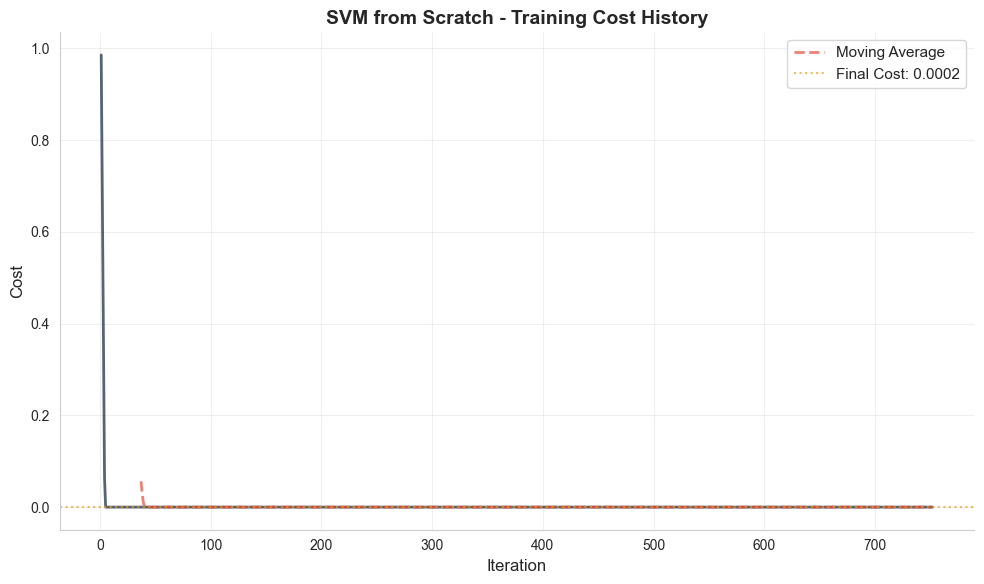

Decision boundary plot saved to: ../results/plots/decision_boundaries/svm_scratch_linear.png


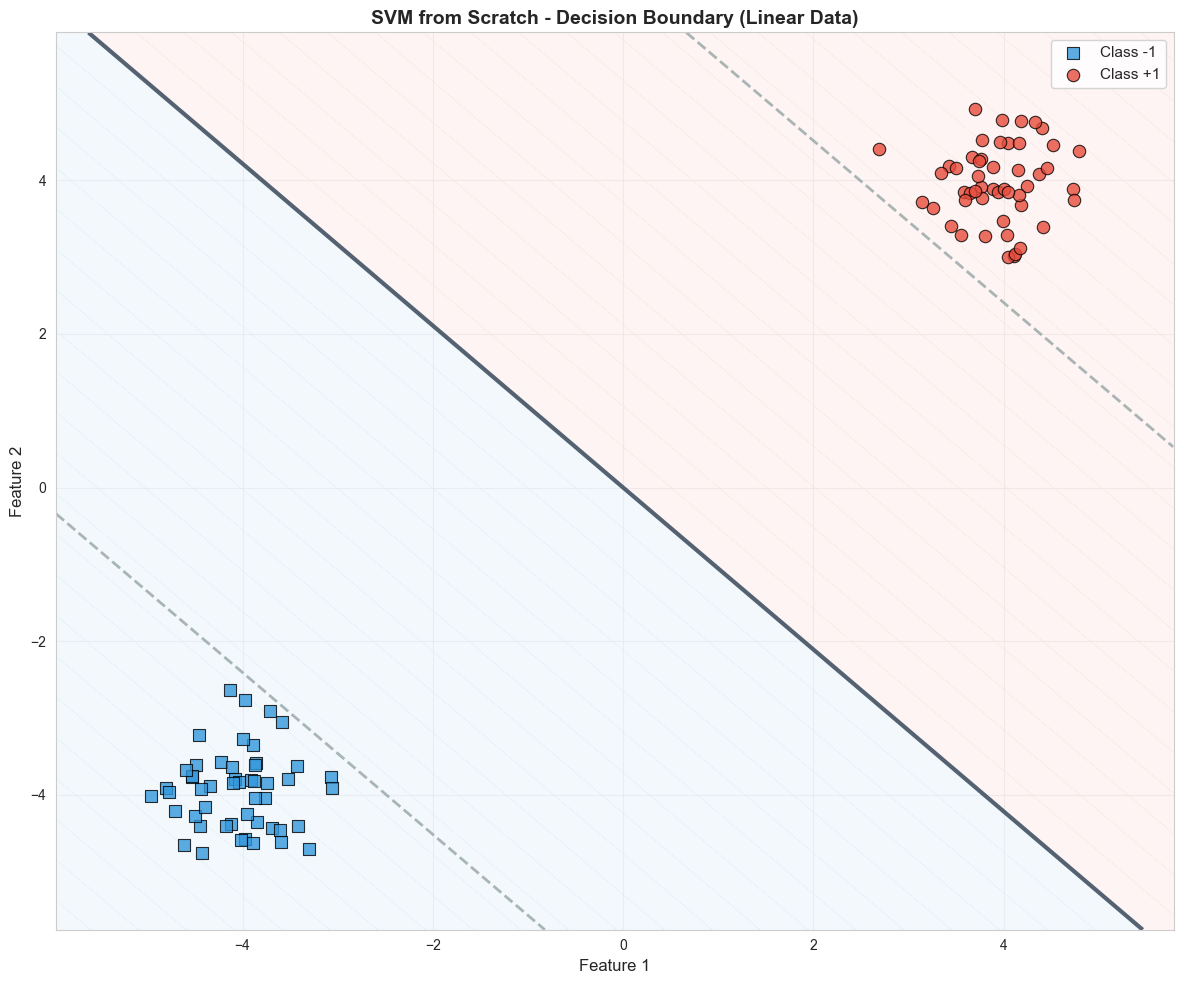

Decision boundary plot created successfully

Decision Function Analysis:
   • Decision values range: [-1.438, 1.424]
   • Mean decision value: -0.006
   • Points near boundary (|decision| <= 1.1): 14

Detailed Performance Analysis:
   • Correct predictions: 100/100
   • Class +1 accuracy: 1.0000
   • Class -1 accuracy: 1.0000
   • Probability predictions shape: (100, 2)
   • Max probability: 0.7622
   • Min probability: 0.2378


In [21]:
print("Creating visualizations for SVM from scratch...")
print("=" * 60)

# Plot training history
fig1 = plot_training_history(
    svm_scratch.costs,
    title="SVM from Scratch - Training Cost History",
    save_path="../results/plots/training_history/svm_scratch_cost.png"
)
plt.show()

# Plot decision boundary
try:
    fig2 = plot_decision_boundary(
        X_linear, y_linear,
        svm_scratch,
        title="SVM from Scratch - Decision Boundary (Linear Data)",
        save_path="../results/plots/decision_boundaries/svm_scratch_linear.png",
        show_support_vectors=False,  # Doesn't store support vectors explicitly
        show_margins=True
    )
    plt.show()

    print("Decision boundary plot created successfully")

except Exception as e:
    print(f"Could not create decision boundary plot: {e}")
    print("Check decision_function implementation")

# Analyze decision function values
decision_values = svm_scratch.decision_function(X_linear)
print(f"\nDecision Function Analysis:")
print(f"   • Decision values range: [{decision_values.min():.3f}, {decision_values.max():.3f}]")
print(f"   • Mean decision value: {decision_values.mean():.3f}")

# Points close to decision boundary (potential support vectors)
margin_threshold = 1.1
close_to_boundary = np.abs(decision_values) <= margin_threshold
print(f"   • Points near boundary (|decision| <= {margin_threshold}): {np.sum(close_to_boundary)}")

# Detailed performance analysis
print(f"\nDetailed Performance Analysis:")
predictions = svm_scratch.predict(X_linear)
correct_predictions = predictions == y_linear

print(f"   • Correct predictions: {np.sum(correct_predictions)}/{len(y_linear)}")
print(f"   • Class +1 accuracy: {np.mean(predictions[y_linear == 1] == 1):.4f}")
print(f"   • Class -1 accuracy: {np.mean(predictions[y_linear == -1] == -1):.4f}")

# Probability predictions
probabilities = svm_scratch.predict_proba(X_linear)
print(f"   • Probability predictions shape: {probabilities.shape}")
print(f"   • Max probability: {probabilities.max():.4f}")
print(f"   • Min probability: {probabilities.min():.4f}")

🔄 Non-linear Data Testing

In [27]:
print("Testing SVM from Scratch...")
print("=" * 60)

# Train on non-linear data (poorer performance expected)
print("\n2. TRAINING ON NON-LINEARLY SEPARABLE DATA")
print("-" * 50)

svm_nonlinear = SVMFromScratch(
    learning_rate=0.01,
    lambda_param=0.01,
    n_iters=1000,
    tolerance=1e-6,
    early_stopping=True,
    verbose=False  # Less verbose
)

# Train the model
print("Starting SVM Training on non-linear data...")
svm_nonlinear.fit(X_nonlinear, y_nonlinear)

# Evaluate performance
nonlinear_accuracy = svm_nonlinear.score(X_nonlinear, y_nonlinear)
nonlinear_info = svm_nonlinear.get_training_info()

print(f"\nNon-Linear Data Results:")
print(f"   • Training accuracy: {nonlinear_accuracy:.4f}")
print(f"   • Final cost: {nonlinear_info['final_cost']:.6f}")
print(f"   • Iterations: {nonlinear_info['iterations']}")
print(f"   • Converged: {nonlinear_info['converged']}")

print(f"\nExpected Result: Lower accuracy due to linear decision boundary on non-linear data")

# Compare performance
print(f"\nPERFORMANCE COMPARISON:")
print(f"   • Linear data accuracy: {accuracy:.4f}")
print(f"   • Non-linear data accuracy: {nonlinear_accuracy:.4f}")
print(f"   • Performance difference: {(accuracy - nonlinear_accuracy):.4f}")

Testing SVM from Scratch...

2. TRAINING ON NON-LINEARLY SEPARABLE DATA
--------------------------------------------------
Starting SVM Training on non-linear data...

Non-Linear Data Results:
   • Training accuracy: 0.6050
   • Final cost: 0.937396
   • Iterations: 872
   • Converged: True

Expected Result: Lower accuracy due to linear decision boundary on non-linear data

PERFORMANCE COMPARISON:
   • Linear data accuracy: 1.0000
   • Non-linear data accuracy: 0.6050
   • Performance difference: 0.3950
